In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('./Downloads/diabetes.csv')

In [4]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']
X
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
scaler=StandardScaler()
df_scaler=scaler.fit_transform(X)
print(df_scaler)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [6]:
X=df_scaler
y=df['Outcome']

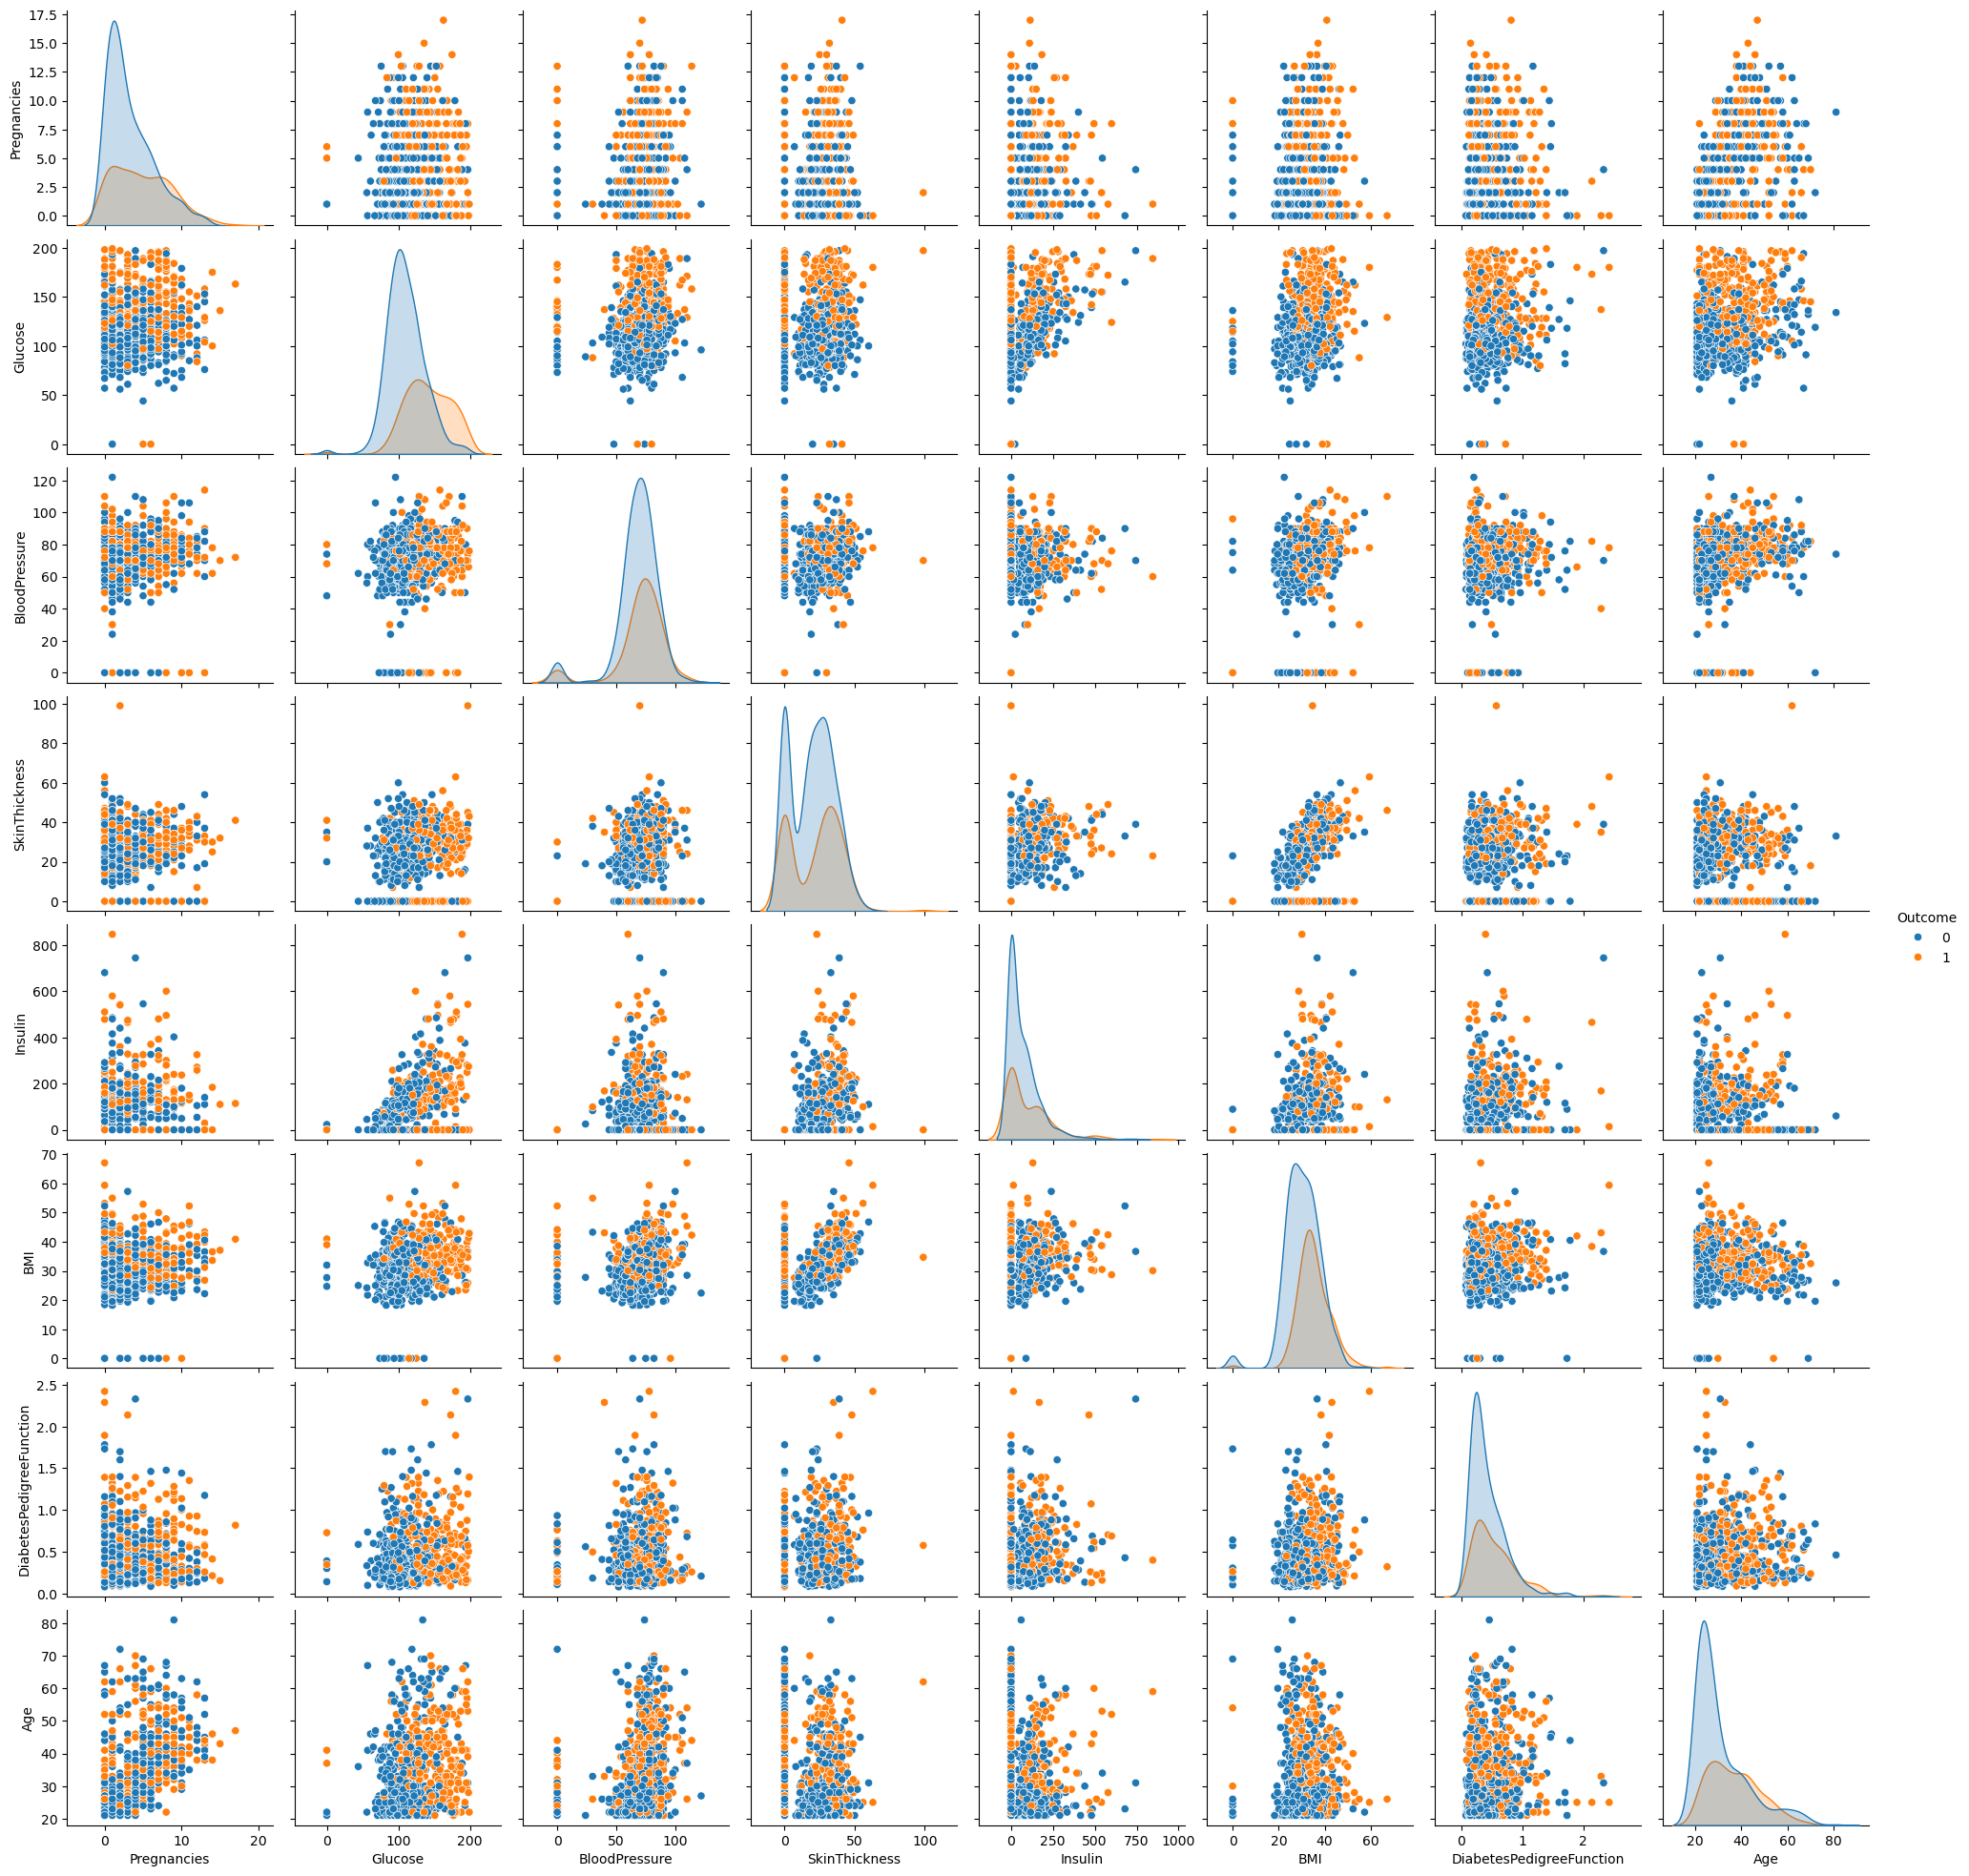

In [7]:
import seaborn as sns
sns.pairplot(df, hue='Outcome')

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_auc_score,roc_curve

In [21]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVM":SVC(),
    "GradientBooster":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)

    #for train data
    model_train_accuracy=accuracy_score(y_train,y_train_predict)
    model_train_precision=precision_score(y_train,y_train_predict)
    model_train_recall=recall_score(y_train,y_train_predict)
    model_train_f1=f1_score(y_train,y_train_predict,average='weighted')
    model_train_rocauc_score=roc_auc_score(y_train,y_train_predict)

    #for test data
    model_test_accuracy=accuracy_score(y_test,y_test_predict)
    model_test_precision=precision_score(y_test,y_test_predict)
    model_test_recall=recall_score(y_test,y_test_predict)
    model_test_f1=f1_score(y_test,y_test_predict,average='weighted')
    model_test_rocauc_score=roc_auc_score(y_test,y_test_predict)

    print(list(models.keys())[i])
    print("Model performance for train set")
    print(f"Train accuracy of model: {model_train_accuracy}")
    print(f"Train precision of model:{model_train_precision}")
    print(f"Train recall of model:{model_train_recall}")
    print(f"Train f1 score of model:{model_train_f1}")
    print(f"Train roc_auc_score of model:{model_train_rocauc_score}")

    print("Model performance for test set")
    print(f"Test accuracy of model: {model_test_accuracy}")
    print(f"Test precision of model:{model_test_precision}")
    print(f"Test recall of model:{model_test_recall}")
    print(f"Test f1 score of model:{model_test_f1}")
    print(f"Test roc_auc_score of model:{model_test_rocauc_score}")

    print("--------------------------------------------------------")

Logistic Regression
Model performance for train set
Train accuracy of model: 0.7850162866449512
Train precision of model:0.7469879518072289
Train recall of model:0.5794392523364486
Train f1 score of model:0.7775228126243332
Train roc_auc_score of model:0.7372196261682242
Model performance for test set
Test accuracy of model: 0.7597402597402597
Test precision of model:0.717948717948718
Test recall of model:0.5185185185185185
Test f1 score of model:0.7487456279654329
Test roc_auc_score of model:0.7042592592592593
--------------------------------------------------------
Decision Tree
Model performance for train set
Train accuracy of model: 1.0
Train precision of model:1.0
Train recall of model:1.0
Train f1 score of model:1.0
Train roc_auc_score of model:1.0
Model performance for test set
Test accuracy of model: 0.6948051948051948
Test precision of model:0.5813953488372093
Test recall of model:0.46296296296296297
Test f1 score of model:0.6854556495441824
Test roc_auc_score of model:0.64148

In [11]:
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [12]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [14]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params)
    ]

In [15]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [19]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f".....................Best Params for {model_name}.......")
    print(model_param[model_name])

ValueError: too many values to unpack (expected 2)